In [1]:
import sklearn
import tensorflow as tf
from tensorflow import keras
from matplotlib import pylab as plt
import numpy as np
# import matplotlib #don't delete!

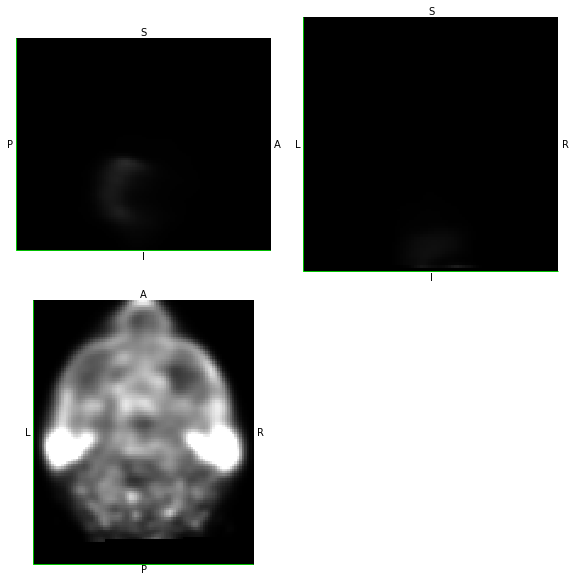

(91, 109, 91)

In [2]:
from matplotlib import pylab as plt
import nibabel as nib
from nibabel.viewers import OrthoSlicer3D
example_filename = "./datasets/A4/A4_aligned/B10018169/Florbetapir/cmeanA4_B10018169_MR_Florbetapir_Br_20200720182306561_S893044_I1321166.nii.gz"
 
img = nib.load(example_filename)
OrthoSlicer3D(img.dataobj).show()
fdata=img.get_fdata()
fdata.shape

In [6]:
from dataloader.A4 import preprocess_save_img,load_data
from sklearn.model_selection import train_test_split,KFold

x=load_data("A4_C3COMP_PRV2.csv",max_size=-1)
# pre_fy=lambda y:1 if y=="positive" else 0
# dataset=(x,y)
x_train,x_test=train_test_split(
    x,test_size=0.1,random_state=1919810
)
x_train,x_val=train_test_split(
    x_train,test_size=0.05,random_state=114514
)

train_data_dir="datasets/A4/train"
val_data_dir="datasets/A4/val"
test_data_dir="datasets/A4/test"

train_data_file=preprocess_save_img(x_train,train_data_dir,4)
val_data_file=preprocess_save_img(x_val,val_data_dir)
test_data_file=preprocess_save_img(x_test,test_data_dir)

# train_d,val_d,test_d=(
#     A4Dataset_train(x_train,y_train,ag_rate=4,batch_size=64,pre_fy=pre_fy),
#     A4Dataset_test(x_val,y_val,batch_size=64,pre_fy=pre_fy),
#     A4Dataset_test(x_test,y_test,batch_size=64,pre_fy=pre_fy)
# )

print("Train imgs:",len(x_train))
print("Val imgs:",len(x_val))
print("Test imgs:",len(x_test))

# kf = KFold(n_splits=10)

100%|██████████| 5580/5580 [00:03<00:00, 1406.48it/s]


Total data number:4323
unusable BID:['B10250828', 'B10297864', 'B10314311', 'B10466532', 'B10475432', 'B10580593', 'B10586719', 'B10631248', 'B10667552', 'B10681577', 'B10812124', 'B11168665', 'B11187381', 'B11238033', 'B11255389', 'B11322811', 'B11767634', 'B11820299', 'B11840262', 'B11894979', 'B11941178', 'B12108081', 'B12115504', 'B12121724', 'B12265847', 'B12324910', 'B12331417', 'B12340275', 'B12366573', 'B12384965', 'B12385660', 'B12419017', 'B12503145', 'B12516386', 'B12566059', 'B12718359', 'B12785765', 'B12793000', 'B12889233', 'B13020956', 'B13059353', 'B13158817', 'B13237835', 'B13304203', 'B13322134', 'B13407266', 'B13499611', 'B13576928', 'B13633323', 'B13672561', 'B13695871', 'B13763305', 'B13854682', 'B13857782', 'B13889467', 'B13923837', 'B14204687', 'B14302489', 'B14305912', 'B14507023', 'B14577940', 'B14656044', 'B14749332', 'B14922826', 'B14930098', 'B15028535', 'B15118422', 'B15178934', 'B15385431', 'B15520439', 'B15547888', 'B15581562', 'B15658614', 'B15687203', '

100%|██████████| 3695/3695 [04:16<00:00, 14.38it/s]


(18475, 42, 50, 42)


100%|██████████| 195/195 [00:06<00:00, 32.13it/s]


(195, 42, 50, 42)


100%|██████████| 433/433 [00:13<00:00, 32.28it/s]


(433, 42, 50, 42)
Train imgs: 3695
Val imgs: 195
Test imgs: 433


In [7]:
###set target_dict
csv_name="A4_C3COMP_PRV2"
tc="Sex"
pf=lambda x:1 if x[0]=="M"else 0
tg_dict={
    "csv_name":csv_name+".csv",
    "target_column":tc,
    "prefunc":pf
}

In [8]:
### make target data
from dataloader.A4 import preprocess_save_target
train_data_dir="datasets/A4/train"
val_data_dir="datasets/A4/val"
test_data_dir="datasets/A4/test"
train_data_file,val_data_file,test_data_file=(
    "datasets/A4/train/dataset.npy",
    "datasets/A4/val/dataset.npy",
    "datasets/A4/test/dataset.npy")

train_target_file,val_target_file,test_target_file=(
    "datasets/A4/train/target.npy",
    "datasets/A4/val/target.npy",
    "datasets/A4/test/target.npy")
train_target_file=preprocess_save_target(train_data_dir,**tg_dict)
val_target_file=preprocess_save_target(val_data_dir,**tg_dict)
test_target_file=preprocess_save_target(test_data_dir,**tg_dict)

print(train_target_file)
print(val_target_file)
print(test_target_file)


(18475,)
(195,)
(433,)
datasets/A4/train/target.npy
datasets/A4/val/target.npy
datasets/A4/test/target.npy


In [9]:
from tensorflow.keras import callbacks
import matplotlib.pyplot as plt
import numpy as np
import time
from units.model import CNN3D

cb = [
    callbacks.ModelCheckpoint(
        filepath="checkpoints/ckpt-loss={loss:.2f}", save_freq=10000
    )
]
model=CNN3D(cls_num=2)
history=model.fit(
    x=np.load(train_data_file,"r"),
    y=np.load(train_target_file,"r"),
    batch_size=64,epochs=30,callbacks=cb,
    validation_data=(np.load(val_data_file,"r"),np.load(val_target_file,"r"))
)

model.save("./models/m{}.h5".format(time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime())))
model.save("./models/latest.h5")

# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

Epoch 1/30
289/289 [==============================] - 24s 70ms/step - loss: 0.6865 - sparse_categorical_accuracy: 0.5542 - val_loss: 0.6600 - val_sparse_categorical_accuracy: 0.6667
Epoch 2/30
289/289 [==============================] - 20s 68ms/step - loss: 0.6488 - sparse_categorical_accuracy: 0.6219 - val_loss: 0.5932 - val_sparse_categorical_accuracy: 0.6769
Epoch 3/30
289/289 [==============================] - 19s 67ms/step - loss: 0.6227 - sparse_categorical_accuracy: 0.6580 - val_loss: 0.5545 - val_sparse_categorical_accuracy: 0.7282
Epoch 4/30
289/289 [==============================] - 19s 67ms/step - loss: 0.5986 - sparse_categorical_accuracy: 0.6885 - val_loss: 0.5170 - val_sparse_categorical_accuracy: 0.7795
Epoch 5/30
289/289 [==============================] - 20s 68ms/step - loss: 0.5719 - sparse_categorical_accuracy: 0.7158 - val_loss: 0.4793 - val_sparse_categorical_accuracy: 0.8000
Epoch 6/30
289/289 [==============================] - 20s 68ms/step - loss: 0.5457 - spars

In [10]:
### advanced learn
from tensorflow.keras.models import load_model
from tensorflow.keras import callbacks
cb = [
    callbacks.ModelCheckpoint(
        filepath="checkpoints/ckpt-loss={loss:.2f}", save_freq=10000
    )
]
model=load_model("./models/latest.h5")
history=model.fit(
    x=np.load(train_data_file,"r"),
    y=np.load(train_target_file,"r"),
    batch_size=64,epochs=30,callbacks=cb,
    validation_data=(np.load(val_data_file,"r"),np.load(val_target_file,"r"))
)

model.save("./models/m{}.h5".format(time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime())))
model.save("./models/latest.h5")

Epoch 1/30
289/289 [==============================] - 21s 69ms/step - loss: 0.2865 - sparse_categorical_accuracy: 0.8806 - val_loss: 0.2596 - val_sparse_categorical_accuracy: 0.8974
Epoch 2/30
289/289 [==============================] - 20s 68ms/step - loss: 0.2815 - sparse_categorical_accuracy: 0.8840 - val_loss: 0.2560 - val_sparse_categorical_accuracy: 0.9026s: 0.2826 - sparse_categori
Epoch 3/30
289/289 [==============================] - 20s 67ms/step - loss: 0.2751 - sparse_categorical_accuracy: 0.8865 - val_loss: 0.2567 - val_sparse_categorical_accuracy: 0.8974
Epoch 4/30
289/289 [==============================] - 20s 68ms/step - loss: 0.2722 - sparse_categorical_accuracy: 0.8879 - val_loss: 0.2526 - val_sparse_categorical_accuracy: 0.9026
Epoch 5/30
289/289 [==============================] - 19s 67ms/step - loss: 0.2675 - sparse_categorical_accuracy: 0.8902 - val_loss: 0.2503 - val_sparse_categorical_accuracy: 0.8974
Epoch 6/30
289/289 [==============================] - 20s 69ms/

In [11]:
from tensorflow.keras import metrics
from tensorflow.keras.models import load_model
import os

model=load_model("./models/latest.h5")
test_data_dir="datasets/A4/test"
test_data_file=os.path.join(test_data_dir,"dataset.npy")
test_target_file=os.path.join(test_data_dir,"target.npy")

x_test=np.load(test_data_file,"r")
y_testtruth=np.load(test_target_file,"r")

y_predit=model.predict(x_test)
tot=metrics.sparse_categorical_accuracy(y_testtruth,y_predit)
acc=sum(tot)/len(tot)
print("Test accuracy={}".format(acc.numpy()))


Test accuracy=0.9330254197120667


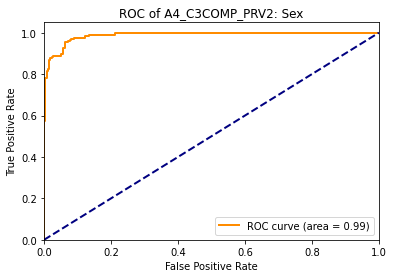

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
# from scipy import interp


# ylabel=label_binarize(y_testp,classes=[0,1])
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(2):
fpr, tpr, _ = roc_curve(y_testtruth, y_predit[:, 1])
roc_auc = auc(fpr, tpr)
# fpr[0].shape==tpr[0].shape==(21, ), fpr[1].shape==tpr[1].shape==(35, ), fpr[2].shape==tpr[2].shape==(33, ) 
# roc_auc {0: 0.9118165784832452, 1: 0.6029629629629629, 2: 0.7859477124183007}

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
plt.title('ROC of {}'.format(csv_name+": "+tc))
plt.legend(loc="lower right")


res_dir="result"
if not os.path.exists(res_dir):os.makedirs(res_dir)
plt.savefig(os.path.join(res_dir,csv_name+"_"+tc))
plt.show()